# Primjena FeNiCs integratora na česte tipove parcijalnih diferencijalnih jednadžbi
## 1. Rješavanje Laplaceove PDE
$\nabla^2u=0$


$u(0,y)=u(1,y)=0$, 

$u(x,0)=u(x,1)=1$

error_L2  = 0.552239831853036
error_max = 0.9166437860609358


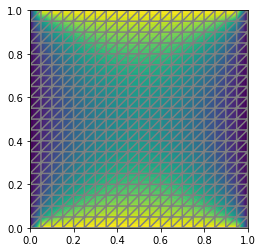

In [8]:
from fenics import *

mesh = UnitSquareMesh(20, 20)
V = FunctionSpace(mesh, 'P', 1)
u_D = Expression('x[0]<0.001 || x[0]>0.999?0.:1.', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression('0.',degree=2)#Constant(1.)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh
plot(u)
plot(mesh)

# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)



## 2. Generalizacija laplasijana

$\nabla(x^2 \nabla u)=0$


$u(0,y)=u(1,y)=0$, 

$u(x,0)=u(x,1)=1$

error_L2  = 0.49173208523664647
error_max = 0.9467451548555993


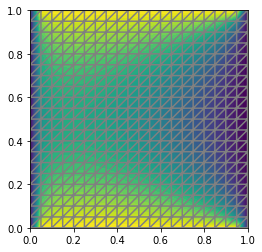

In [11]:
from fenics import *

mesh = UnitSquareMesh(20, 20)
V = FunctionSpace(mesh, 'P', 1)
u_D = Expression('x[0]<0.001 || x[0]>0.999?0.:1.', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
p = Expression('x[0]*x[0]',degree=2)
f = Expression('0.',degree=2)#Constant(1.)
a = p*dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh
plot(u)
plot(mesh)

# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

## 3. Vremenski ovisni problem
Rješavanje kombiniranjem metode konačnih elemenata i Eulerove metode

0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999
1.2
1.3
1.4000000000000001
1.5000000000000002
1.6000000000000003
1.7000000000000004
1.8000000000000005
1.9000000000000006
2.0000000000000004
2.1000000000000005
2.2000000000000006
2.3000000000000007


/home/ktisanic/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2.400000000000001
2.500000000000001
2.600000000000001
2.700000000000001
2.800000000000001
2.9000000000000012
3.0000000000000013
3.1000000000000014
3.2000000000000015
3.3000000000000016
3.4000000000000017
3.5000000000000018
3.600000000000002
3.700000000000002
3.800000000000002
3.900000000000002
4.000000000000002
4.100000000000001
4.200000000000001
4.300000000000001
4.4
4.5
4.6
4.699999999999999
4.799999999999999
4.899999999999999
4.999999999999998
5.099999999999998
5.1999999999999975
5.299999999999997
5.399999999999997
5.4999999999999964
5.599999999999996
5.699999999999996
5.799999999999995
5.899999999999995
5.999999999999995
6.099999999999994
6.199999999999994
6.299999999999994
6.399999999999993
6.499999999999993
6.5999999999999925
6.699999999999992
6.799999999999992
6.8999999999999915
6.999999999999991
7.099999999999991
7.19999999999999
7.29999999999999
7.39999999999999
7.499999999999989
7.599999999999989
7.699999999999989
7.799999999999988
7.899999999999988
7.999999999999988
8.099999

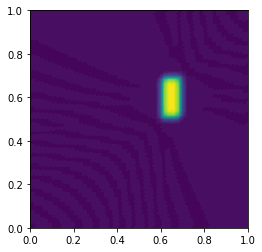

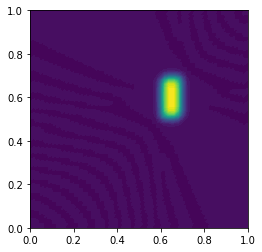

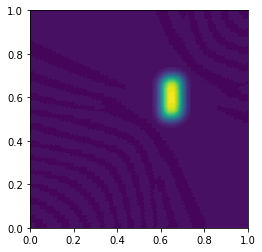

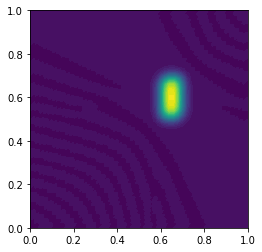

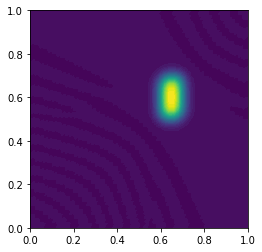

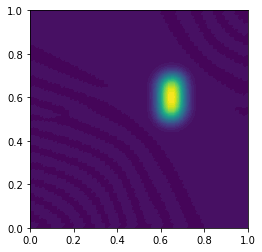

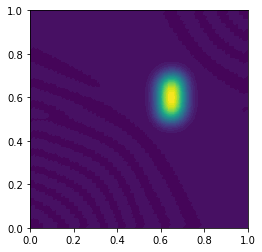

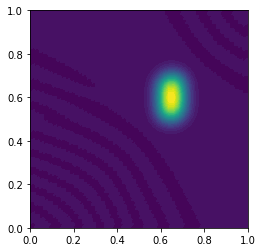

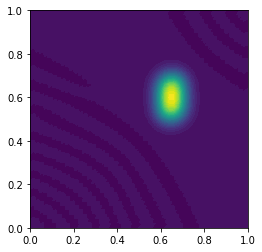

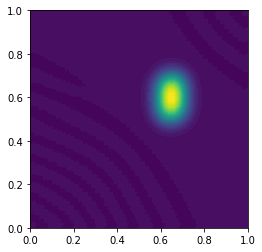

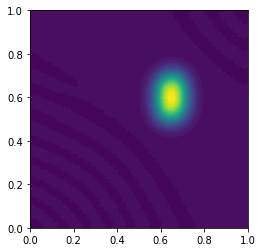

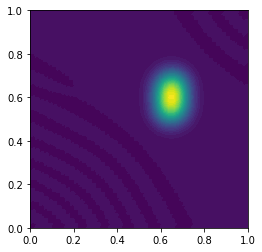

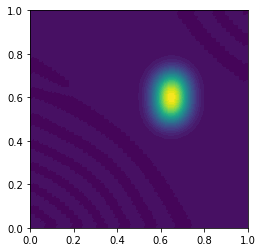

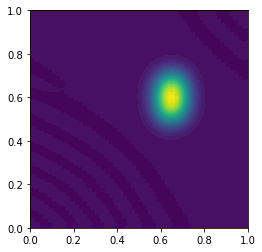

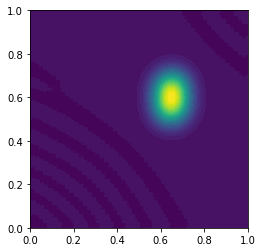

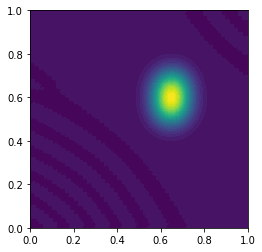

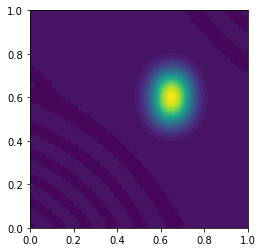

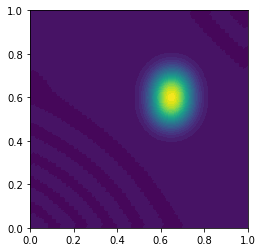

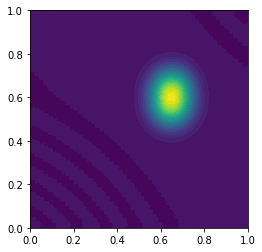

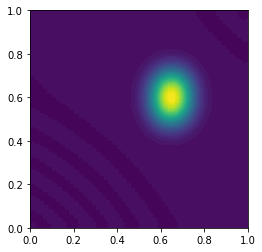

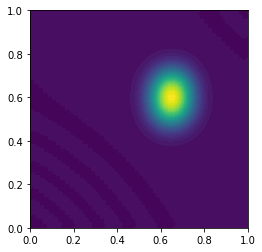

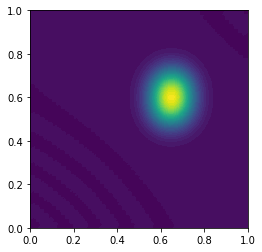

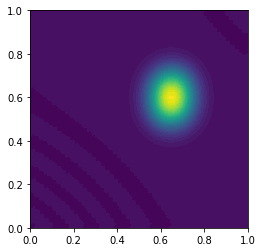

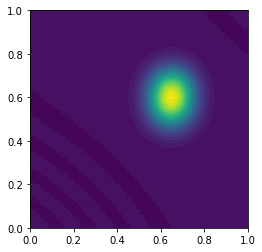

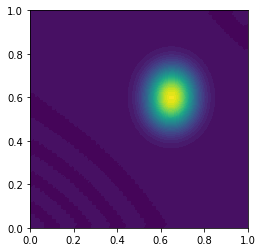

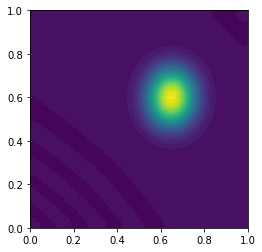

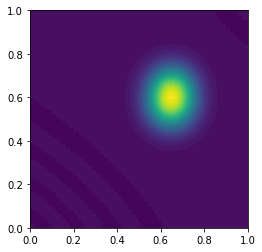

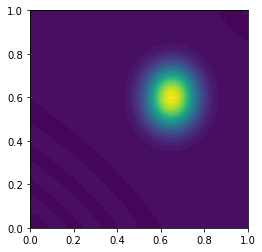

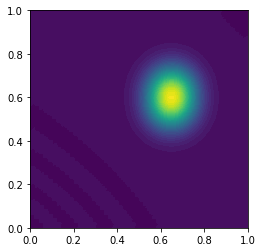

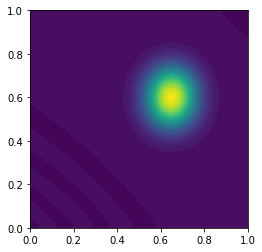

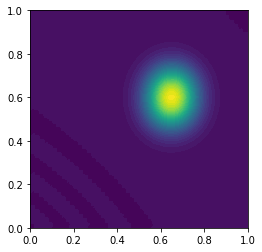

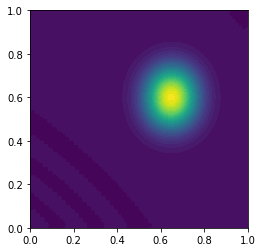

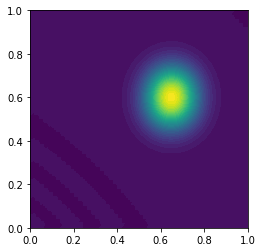

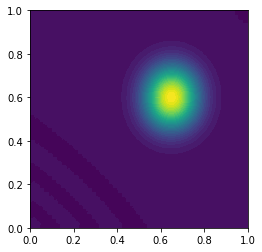

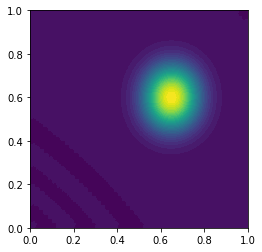

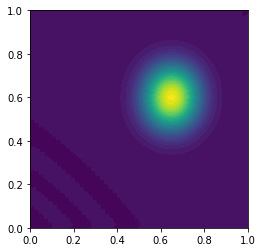

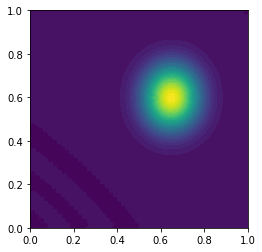

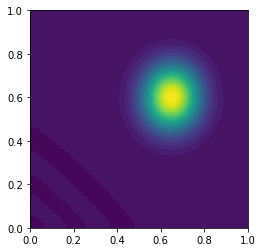

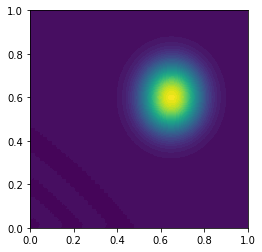

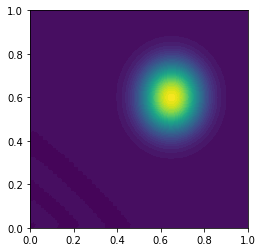

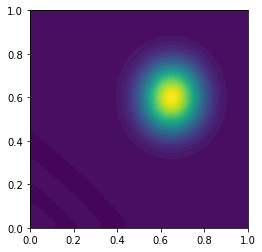

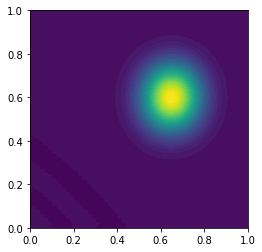

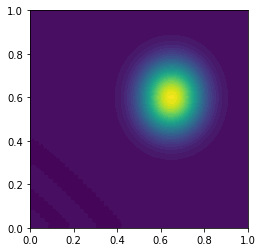

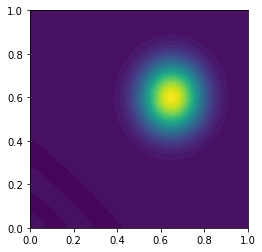

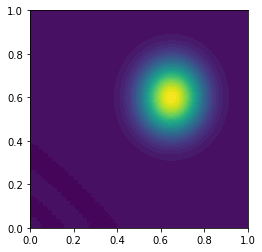

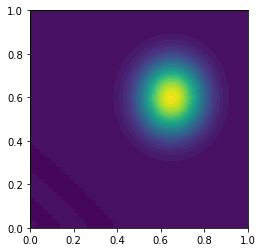

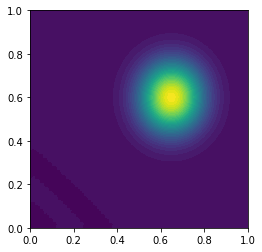

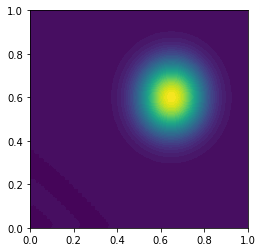

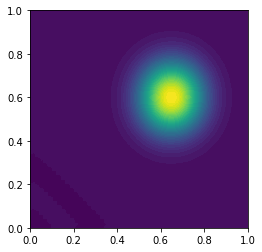

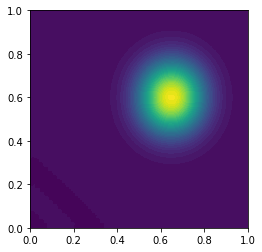

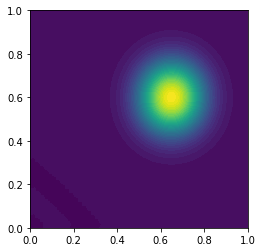

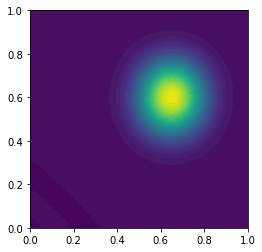

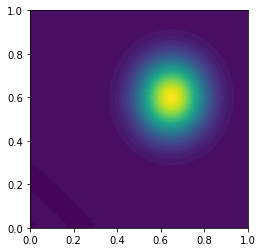

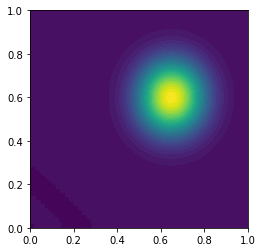

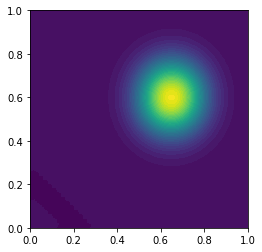

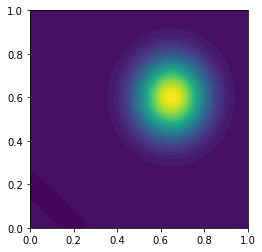

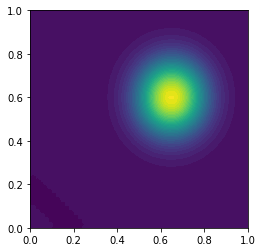

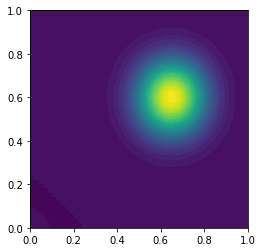

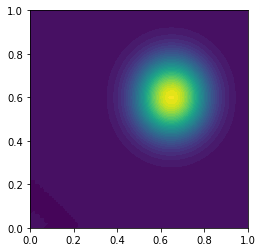

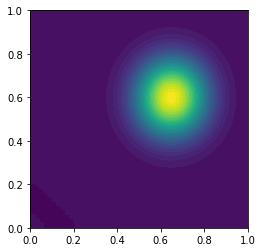

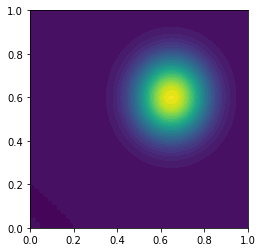

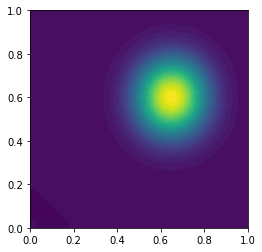

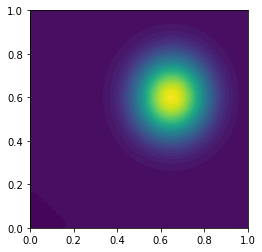

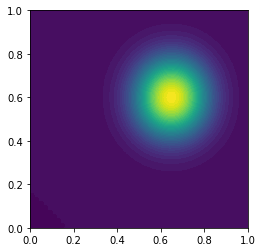

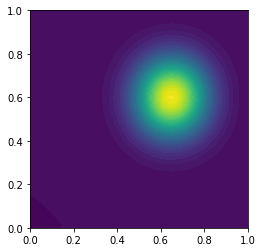

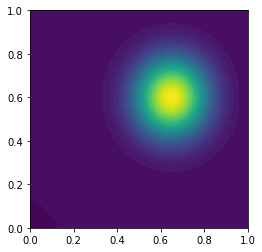

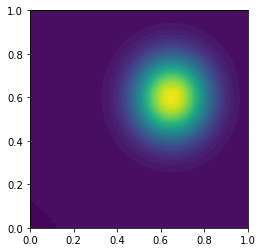

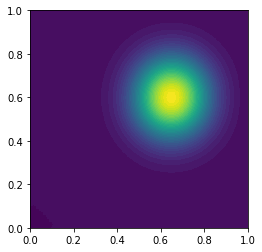

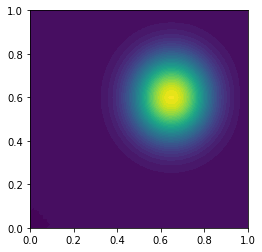

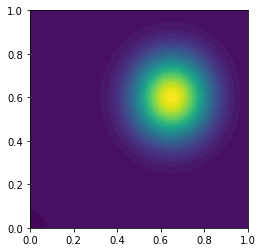

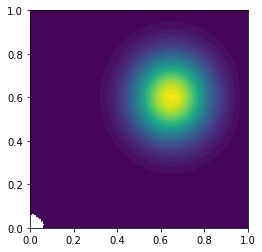

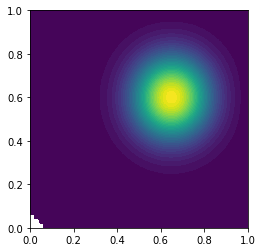

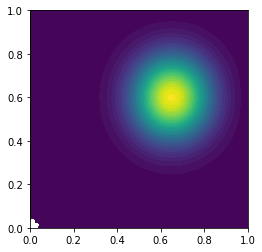

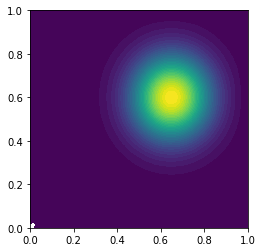

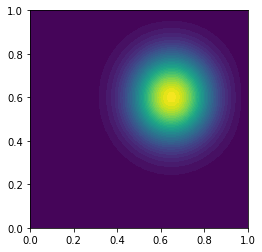

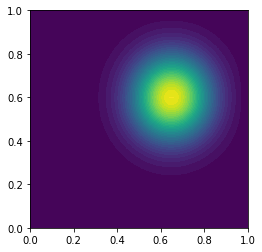

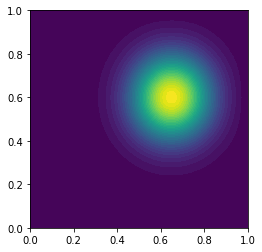

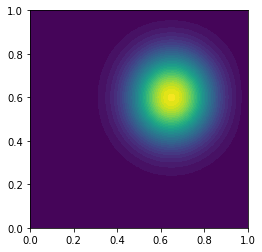

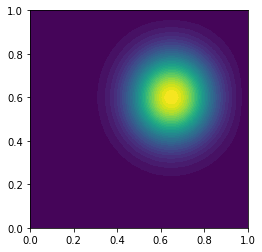

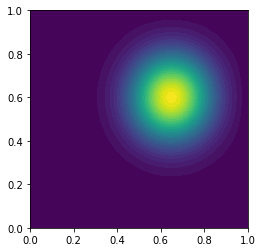

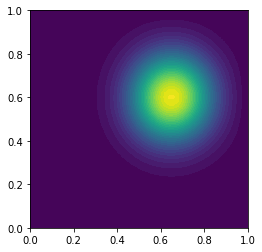

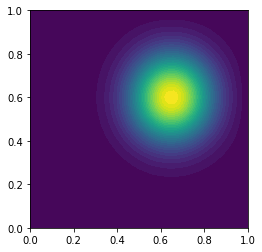

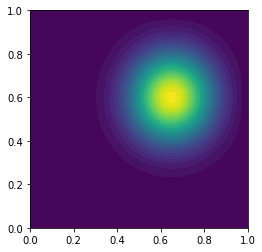

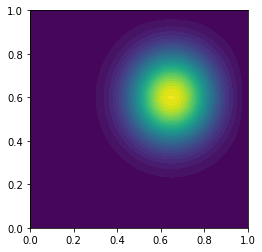

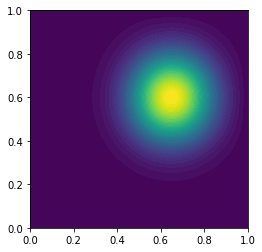

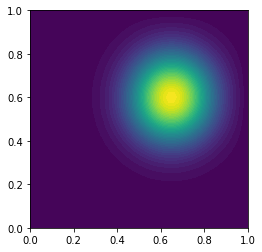

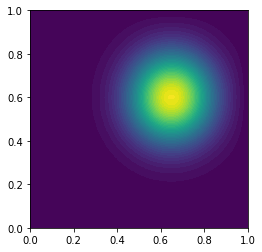

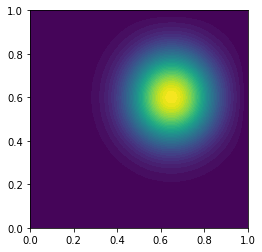

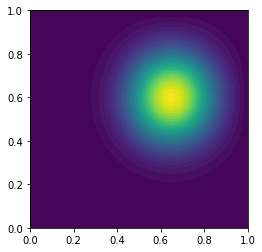

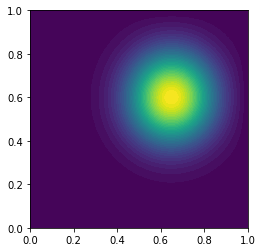

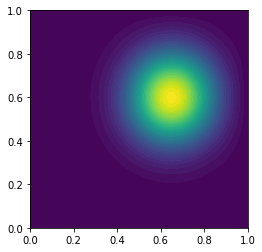

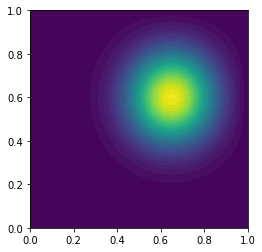

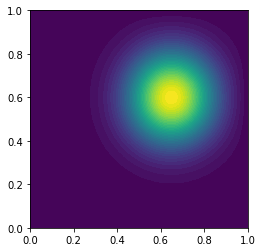

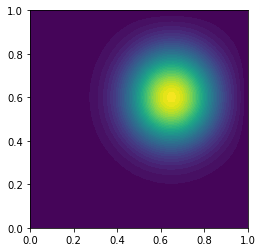

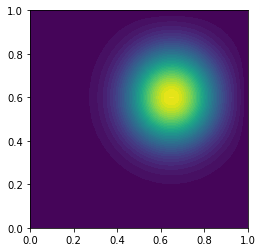

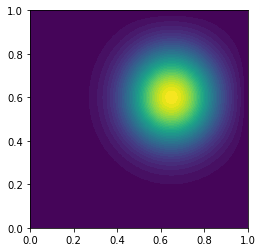

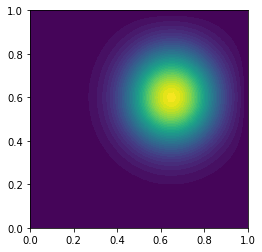

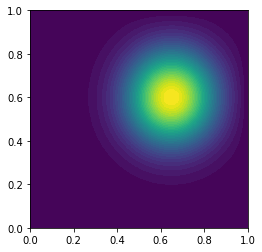

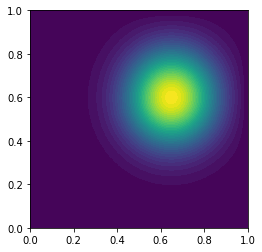

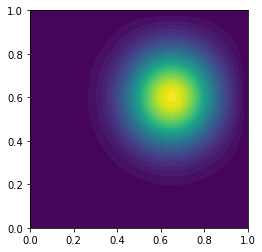

In [58]:
import matplotlib.pyplot as plt
from fenics import *
def boundary(x, on_boundary):
    return on_boundary
mesh = UnitSquareMesh(50, 50)
V    = FunctionSpace(mesh, 'P', 1)
u_D  = Expression('x[0]<0.001 || x[0]>0.999?0.:(x[0]>.6 && x[0]<.7 && x[1]>.5 && x[1]<.7? 100.:0.)', degree=2)
u_1  = interpolate(u_D, V)
K = 1e-4
dt   = .1
bc   = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression('0.',degree=2)#Constant(1.)
a = u*v*dx+ K*dot(grad(u), grad(v))*dx
L = v*u_1*dx+dt*f*v*dx
A = assemble(a)
# Compute solution
u = Function(V)
t = dt
T = 100*dt
i=1
while(t<T):
    b = assemble(L)
    u_D.t = t
    bc.apply(A, b)
    solve(A, u.vector(), b)
    t += dt
    u_1.assign(u)
    print(t)
    plt.figure()
    # Plot solution and mesh
    plot(u)
    plt.savefig("plot/%3d.png"%i)
    i+=1
